### Student Information
Name: Kevin Harryyanto (丘騏銘)

Student ID: 108065425

GitHub ID: 13048557 (github.com/kharryyanto)

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

In [2]:
### Begin Assignment Here

"""
IMPORTANT NOTE:
- DO NOT run the cells in Part 1. The cells are directly copied over from the Master Repository.
- You can run the cells starting from Part 2.
- Some plotly plots may not be visible. If so, refer to the relevant iPython notebook from the Master Repository and run
the code.
"""

# Part 1: Take Home Exercises from Master Repository

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [28]:
#Answer here

# Find texts that contains .edu email addresses, and query every 3 records. Show only the last 5 records.
X[X['text'].str.contains('.edu')].loc[::3, 'text'][-5:]

2237    From: datepper@phoenix.Princeton.EDU (David Aa...
2241    From: dls@aeg.dsto.gov.au (David Silver) Subje...
2244    From: jim.zisfein@factory.com (Jim Zisfein)  S...
2249    From: shellgate!llo@uu4.psi.com (Larry L. Over...
2254    From: sasghm@theseus.unx.sas.com (Gary Merrill...
Name: text, dtype: object

---

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [45]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [46]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [47]:
# Answer here

"""
A is numpy's NaN, which is equivalent to a null data type, so .isnull() returns True.

B does not specify the missing_example value, so pandas automatically assigned a null value (numpy's NaN)
to this unprovided cell, so .isnull() returns True.

C is the string 'NaN' and this does not equal to a null data type, so .isnull() returns False.

D is the string 'None' and just like C, it is a string value, so .isnull() returns False.

E is Python's built-in None data type, which is equivalent to null, so .isnull() returns True.

F is an empty string. Even though it is an empty value, it does not equal to being null, so .isnull() returns False.
"""

missing = NA_df['missing_example'].tolist()
for item in missing:
    print(type(item)) # Notice how the first two results are listed as float.

# Verifies the first two float results are indeed numpy's NaN.
print(np.isnan(missing[0]))
print(np.isnan(missing[1]))

<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'str'>
True
True


---

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [60]:
# Answer here

"""
There does not seem to be any changes to X when X_sample is created. Looking at the documentation for .sample(),
only the "replace" parameter seem to have an effect on the original dataframe. Since it is False by default, the
original dataframe X was not affected. We can also see below that even though X_sample has a randomly ordered index,
the original X still retains its original order. Furthermore, there are no truncations of data within X after sampling,
which further justifies that X still retains its original state after sampling.
"""
# Views the first 5 entries of X_sample
print(X_sample.head())

# Using the index of the selected sample data, select a subset of data from X. Notice that index is still in order
print(X[X.index.isin(X_sample.index)].head())

# Views the first 5 entries of X. Verifies that index order is stll unchanged
print(X.head())

# Verifies that the text data of one sample in X and X_sample is the same, which means that no truncation has occurred.
print(X.loc[X_sample.index[0],"text"] == X_sample.loc[X_sample.index[0], "text"])

                                                   text  category  \
1670  From: km@ky3b.pgh.pa.us (Ken Mitchum) Subject:...         2   
1155  From: vida@mdavcr.mda.ca (Vida Morkunas) Subje...         2   
246   From: jim.zisfein@factory.com (Jim Zisfein)  S...         2   
878   From: isc10144@nusunix1.nus.sg (CHAN NICODEMUS...         3   
1880  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

               category_name  
1670                 sci.med  
1155                 sci.med  
246                  sci.med  
878   soc.religion.christian  
1880                 sci.med  
                                                 text  category  \
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1   
5   From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6   From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
16  From: texx@ossi.com (Robert "Texx" Woodworth) ...         2 

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

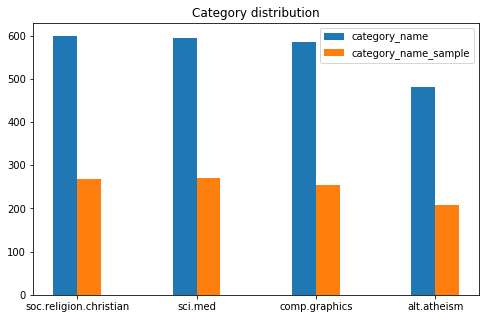

In [66]:
# Answer here

# Create new dataframe for plot
X_plot = pd.DataFrame(X.category_name.value_counts())
X_plot['category_name_sample'] = X_sample.category_name.value_counts()

# x-axis settings
ind = np.arange(len(X_plot))
width = 0.2

# Plot bar chart
fig, ax = plt.subplots(figsize = (8,5))
rect1 = ax.bar(ind-width/2, X_plot['category_name'], width, label = 'category_name')
rect2 = ax.bar(ind+width/2, X_plot['category_name_sample'], width, label = 'category_name_sample')

# Add and change details of plot
ax.set_title('Category distribution')
ax.set_xticks(ind)
ax.set_xticklabels(X_plot.index)
ax.legend()

---

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [79]:
# Answer here

# Taking the fifth record into array form. Note that the result X2 is a nested array, i.e. [[content]].
X2 = X_counts[4,:100].toarray()

# The first [1] gets the second entry of the value '1' in the matrix. The second [1] gets its index.
count_vect.get_feature_names()[np.where(X2 == 1)[1][1]] 

'01'

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

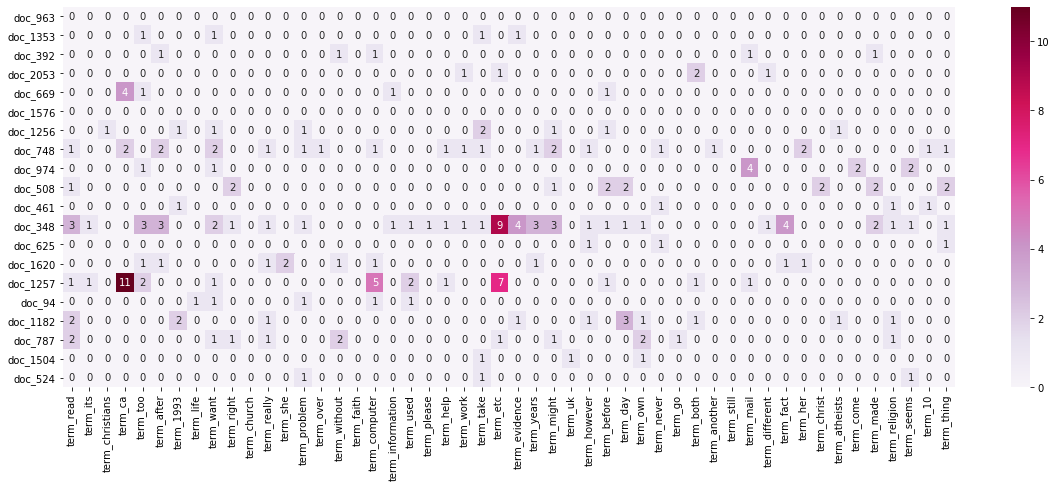

In [87]:
# Answer here

"""
We take 20 samples out of all the documents to ensure that a rough overview of the data can be seen in using just a 
few documents. With a few documents as sample, only then can we create a clear visualization (heatmap).

For the terms, we first partition all the terms into 250 intervals based on their frequency (highest to lowest)
in all the documents.

We then take the first 20 terms in the second interval. This is to ensure that we do not come up with a lot of terms
that are very sparsely used (such that the heatmap will be nearly all zeros). We do not immediately take the top 20
most frequent terms because they are very likely to be stop words that provide no context to the documents.

Notice that now, we can see some relevant terms in the documents.
"""

from random import sample

sample_doc_idx = sample(list(X.index),20) # Take 20 samples of documents
X_sample = X_counts.toarray()
l = round(X_counts.shape[1]/250) # Index of first item in the second interval
top_term_idx = np.argsort(np.sum(X_sample, axis = 0))[::-1][l:l+50] # Take the top 50 terms in the second interval

plot2_x = ["term_"+str(count_vect.get_feature_names()[i]) for i in top_term_idx] # x axis labels
plot2_y = ["doc_"+str(i) for i in sample_doc_idx] # y axis labels
plot2_z = X_sample
plot2_z = plot2_z[sample_doc_idx,:][:,top_term_idx] # corresponding values

df_todraw2 = pd.DataFrame(plot2_z, columns = plot2_x, index = plot2_y)
plt.subplots(figsize=(20, 7))
ax = sns.heatmap(df_todraw2,
                 cmap="PuRd",
                 annot=True) # Plotting in seaborn

---

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

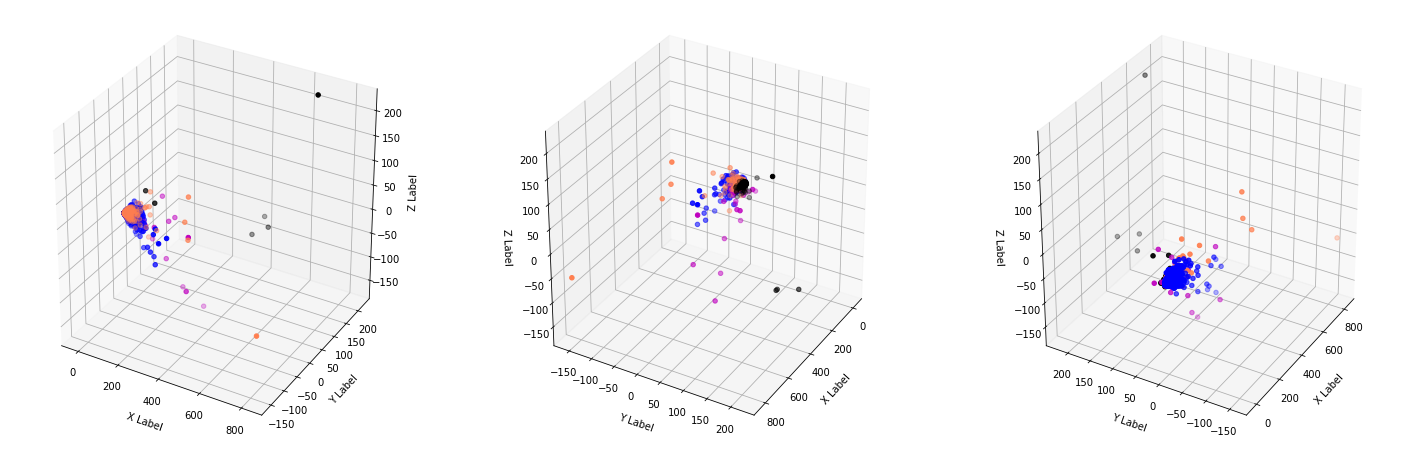

In [93]:
# Answer here

"""
From the results below, we can see that there is a huge cluster of points of different categories near the (0,0,0) point,
with some other points scattered quite far apart. If this were to be projected to a 2D figure, then the resulting image
would look very much like the 2D PCA result above, in which most of the points can be found near the origin.
"""

from mpl_toolkits.mplot3d import Axes3D

X2_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray()) # Reduce dimension to 3 using PCA

# Plotting
fig = plt.figure(figsize = (25,8))
ax1 = fig.add_subplot(131, projection = '3d')
for c, category in zip(col, categories):
    xs = X2_reduced[X['category_name'] == category].T[0]
    ys = X2_reduced[X['category_name'] == category].T[1]
    zs = X2_reduced[X['category_name'] == category].T[2]
    ax1.scatter(xs, ys, zs, c = c, marker = 'o')
ax1.view_init(azim = -60) # Figure rotation angle at -60 degrees (default)
ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')

ax2 = fig.add_subplot(132, projection = '3d')
for c, category in zip(col, categories):
    xs = X2_reduced[X['category_name'] == category].T[0]
    ys = X2_reduced[X['category_name'] == category].T[1]
    zs = X2_reduced[X['category_name'] == category].T[2]
    ax2.scatter(xs, ys, zs, c = c, marker = 'o')
ax2.view_init(azim = 30) # Figure rotation angle at 30 degrees
ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')

ax3 = fig.add_subplot(133, projection = '3d')
for c, category in zip(col, categories):
    xs = X2_reduced[X['category_name'] == category].T[0]
    ys = X2_reduced[X['category_name'] == category].T[1]
    zs = X2_reduced[X['category_name'] == category].T[2]
    ax3.scatter(xs, ys, zs, c = c, marker = 'o')
ax3.view_init(azim = -150) # Figure rotation angle at -150 degrees
ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')

plt.show()

---

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [98]:
# Answer here

"""
IMPORTANT NOTE: plotly may not show results without running this cell first. Refer to the master file in the Master
repository to run the code from the top and view results.

The chart shows the term frequency for all the available data. We can see that the range of the term frequency is large.
Notice that for the x-axis, not all terms are listed due to limited space. Click and select a region to zoom.
"""
import plotly.graph_objs as go

df_tf = pd.DataFrame(data = {'term' : count_vect.get_feature_names(), 'frequency' : term_frequencies})

data = {
    "type" : "bar",
    "x" : df_tf.loc[:,'term'],
    "y" : df_tf.loc[:,'frequency'],
    "marker" : {"color": "blue"}
}

layout = {
  "title": "Word Frequency", 
  "width": 800, 
  "yaxis": {
    "title": "Frequency", 
    "gridcolor": "white",
    "range": [0,5000]
  }, 
  "xaxis": {
    "title": "Words", 
    "gridcolor": "white",
    "type": "category"
  }, 
  "dragmode":"zoom",
  "plot_bgcolor": "white", 
  "paper_bgcolor": "white"
}

fig = go.FigureWidget(data=[data], layout = layout)
fig.show()

---

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [99]:
# Answer here

"""
IMPORTANT NOTE: plotly may not show results without running this cell first. Refer to the master file in the Master
repository to run the code from the top and view results.

This time, we sample 100 terms into the visualization. We can hover on certain bars to get more information on the term.
"""

df_tf_sample = df_tf.sample(n=100)

data = {
    "type" : "bar",
    "x" : df_tf_sample.loc[:,'term'],
    "y" : df_tf_sample.loc[:,'frequency'],
    "marker" : {"color": "green"}
}

layout = {
  "title": "Word Frequency", 
  "width": 800, 
  "yaxis": {
    "title": "Frequency", 
    "gridcolor": "white"
  }, 
  "xaxis": {
    "title": "Words", 
    "gridcolor": "white",
    "type": "category"
  }, 
  "dragmode":"zoom",
  "plot_bgcolor": "white", 
  "paper_bgcolor": "white"
}

fig = go.FigureWidget(data=[data], layout = layout)
fig.show()

---

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [100]:
# Answer here

"""
IMPORTANT NOTE: plotly may not show results without running this cell first. Refer to the master file in the Master
repository to run the code from the top and view results.

Now we sort the data based on word frequency and generate the plot. Notice that we only take the top 250 terms
so that the plot distribution can be easily viewed. If we include all the data, the frequency range is so great that
the distribution would look like the letter "L" (no curve).
"""

df_tf_sorted = df_tf.sort_values(by = 'frequency', ascending = False).reset_index(drop = True)

data = {
    "type" : "bar",
    "x" : df_tf_sorted.loc[:250,'term'], # Take the top 250 terms
    "y" : df_tf_sorted.loc[:250,'frequency'], #Take the top 250 term frequency
    "marker" : {"color": "green"}
}

layout = {
  "title": "Word Frequency", 
  "width": 800, 
  "yaxis": {
    "title": "Frequency", 
    "gridcolor": "white"
  }, 
  "xaxis": {
    "title": "Words", 
    "gridcolor": "white",
    "type": "category"
  }, 
  "dragmode":"zoom",
  "plot_bgcolor": "white", 
  "paper_bgcolor": "white"
}

fig = go.FigureWidget(data=[data], layout = layout)
fig.show()

---

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [109]:
# Answer here

"""
Since category_name is related to category, we can use the same binarizer to binarize category_name.
If it is some other column, then a new binarizer must be initialized and fitted.
The results are shown below.
"""

mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X.head(10)

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   
9                 sci.med  [From, :, libman, @, hsc.usc.edu, (, Marlena, ...   

   bin_category bin_category_name  
0  [0, 1, 0, 0]      [0, 1, 0, 0]  
1  [0, 1, 0, 0]      [0, 1, 0, 0]  
2  [0, 0, 0, 1]      [0, 0, 0, 1]  
3  [0, 0, 0, 1]      [0, 0, 0, 1]  
4  [0, 0, 0, 1]      [0, 0, 0, 1]  
5  [0, 0, 0, 1]      [0, 0, 0, 1]  
6  [0, 0, 0, 1]      [0, 0, 0, 1]  
7  [0, 0, 1, 0]      [0, 0, 1, 0]  
8  [0, 0, 1, 0]      [0, 0, 1, 0]  
9  [0, 0, 1, 0]      [0, 0, 1, 0]

---

# Part 2: Follow process from Master repo to new dataset

Note:
- Start running from this cell.
- Helper functions are not changed.
- Plotly graphs may not be displayed properly, so it is advised to run the DM19-Lab1-SentimentLabelledSentences.ipynb file from the Master repository (https://github.com/kharryyanto/DM19-Lab1-Master).

In [1]:
import math
import pandas as pd
import numpy as np
import nltk
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import plotly.graph_objs as go

# Data Preparation

Objective:  
- Import the dataset
- Store the data in a format which is easy to access

In [2]:
"""
The dataset contains three .txt files in a tab-separated format. We import all of them into three different lists.
"""

with open('./sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.txt','r') as f:
    amazon = f.readlines()

with open('./sentiment labelled sentences/sentiment labelled sentences/imdb_labelled.txt','r') as g:
    imdb = g.readlines()
    
with open('./sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.txt','r') as h:
    yelp = h.readlines()
    
print(amazon[0])
print(imdb[0])
print(yelp[0])

So there is no way for me to plug it in here in the US unless I go by a converter.	0

A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  	0

Wow... Loved this place.	1



In [3]:
"""
We define a function that converts the list data in the previous step into a list of lists. The internal lists will store
both the sentence and score values.
"""

def to_listoflists(x):
    final = [item.replace('\n','').split('\t') for item in x]
    for in_list in final:
        in_list[1] = int(in_list[1])
    return final

In [4]:
[amazon, imdb, yelp] = map(to_listoflists,[amazon, imdb, yelp]) # Converts all three lists into list of lists

print(amazon[:3])

[['So there is no way for me to plug it in here in the US unless I go by a converter.', 0], ['Good case, Excellent value.', 1], ['Great for the jawbone.', 1]]


# Data Transformation

Objective:  
- Converts the data into tabular form using pandas
- Check for null and duplicate values
- Remove null and duplicate values if present

In [5]:
"""
Here we convert the list of lists data into pandas Dataframe for ease of manipulation. All three dataframes are
1000 rows by 2 columns.
"""

cols = ['sentence','score']
amazon_df = pd.DataFrame(amazon, columns = cols)
imdb_df = pd.DataFrame(imdb, columns = cols)
yelp_df = pd.DataFrame(yelp, columns = cols)

print(amazon_df.head())
print(imdb_df.head())
print(yelp_df.head())
print(amazon_df.shape)
print(imdb_df.shape)
print(yelp_df.shape)

                                            sentence  score
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1
                                            sentence  score
0  A very, very, very slow-moving, aimless movie ...      0
1  Not sure who was more lost - the flat characte...      0
2  Attempting artiness with black & white and cle...      0
3       Very little music or anything to speak of.        0
4  The best scene in the movie was when Gerardo i...      1
                                            sentence  score
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank h

In [6]:
"""
We use the data mining helper to check for missing values and find out that there are no missing values in the dataset.
"""

print(amazon_df.isnull().apply(lambda x: dmh.check_missing_values(x)))
print(imdb_df.isnull().apply(lambda x: dmh.check_missing_values(x)))
print(yelp_df.isnull().apply(lambda x: dmh.check_missing_values(x)))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
dtype: object
sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
dtype: object
sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
dtype: object


In [7]:
"""
We check for duplicated rows in the dataset and found that there are duplicates in all three dataframes.
"""

print(sum(amazon_df.duplicated()))
print(sum(imdb_df.duplicated()))
print(sum(yelp_df.duplicated()))

10
3
4


In [8]:
"""
We choose to keep only the first instance of the duplicate. Removing all instances of duplicates would only leave us with
incomplete data, whereas not removing the duplicates will only cause redundancy.

Even though the duplicates may represent two different records, but there are no identifier columns that justifies this.
"""

amazon_df.drop_duplicates(keep = 'first', inplace = True)
imdb_df.drop_duplicates(keep = 'first', inplace = True)
yelp_df.drop_duplicates(keep = 'first', inplace = True)
print(amazon_df.shape) # 1000 rows - 10 duplicated rows = 990 rows
print(imdb_df.shape) # 1000 rows - 3 duplicated rows = 997 rows
print(yelp_df.shape) # 1000 rows - 4 duplicated rows = 996 rows

(990, 2)
(997, 2)
(996, 2)


# Data Preprocessing

Objectives:  
- Sampling
    - Take a sample from the original dataset and compare it with the original
- Feature Creation
    - Tokenize the sentences in the dataset to create the new feature "unigrams"
- Feature Subset Selection
    - Creating and visualizing a document-term matrix from the original dataset
- Dimensionality Reduction
    - Reduce the number of features from the document-term matrix
    - Visualize the reduced data
- Attribute Transformation / Aggregation
    - Visualize the word frequency distribution for the dataset
    - Transforms the visualization into a logarithmic distribution
- Discretization and Binarization
    - Binarize certain columns in the dataset (specifically the "score" and "source" columns)

## Sampling

In [9]:
"""
Combine all the three dataframes into one master dataframe. Also adds a "source" column to signify from which dataset does
a particular record come from.
"""

sources = ['amazon','imdb','yelp']
dfs = [amazon_df,imdb_df,yelp_df]
master_df = pd.concat([df.assign(source = source) for source,df in zip(sources,dfs)], ignore_index = True)

print(master_df.head())
print(master_df.shape)

                                            sentence  score  source
0  So there is no way for me to plug it in here i...      0  amazon
1                        Good case, Excellent value.      1  amazon
2                             Great for the jawbone.      1  amazon
3  Tied to charger for conversations lasting more...      0  amazon
4                                  The mic is great.      1  amazon
(2983, 3)


In [10]:
"""
Take 2000 samples from the master dataframe.
"""

master_df_sample = master_df.sample(2000)
print(master_df_sample.head())
print(master_df_sample.shape)

                                               sentence  score  source
1807  Angus Scrimm also turns in a good performance ...      1    imdb
2520  If you love authentic Mexican food and want a ...      1    yelp
2979                           Appetite instantly gone.      0    yelp
315          We have gotten a lot of compliments on it.      1  amazon
996                                 Wasted two hours.        0    imdb
(2000, 3)


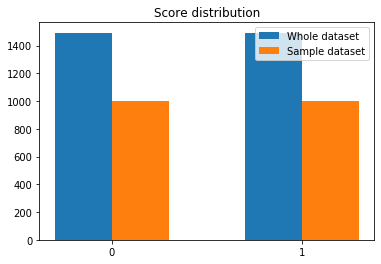

In [11]:
"""
Plot a bar graph to visualize the difference between the sampled data and the original (whole) data.

We can see that in both cases, the number of sentences that has a score of 0 is about the same as the number of sentences
that has a score of 1.
"""

master_plot = pd.DataFrame(master_df.score.value_counts())
master_plot['score_sample'] = master_df_sample.score.value_counts()

ind = np.arange(len(master_plot))
width = 0.3

fig = plt.Figure(figsize = (8,5))
plt.bar(ind-width/2, master_plot['score'], width, label = 'Whole dataset')
plt.bar(ind+width/2, master_plot['score_sample'], width, label = 'Sample dataset')

plt.title('Score distribution')
plt.xticks(ind, master_plot.index)
plt.legend()
plt.show()

## Feature Creation

In [12]:
"""
Use the data mining helper and nltk to tokenize the sentences into unigrams.
"""

master_df['unigrams'] = master_df['sentence'].apply(lambda x: dmh.tokenize_text(x))
master_df.head()

sentence  score  source  \
0  So there is no way for me to plug it in here i...      0  amazon   
1                        Good case, Excellent value.      1  amazon   
2                             Great for the jawbone.      1  amazon   
3  Tied to charger for conversations lasting more...      0  amazon   
4                                  The mic is great.      1  amazon   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...  
4                           [The, mic, is, great, .]

## Feature Subset Selection

In [13]:
"""
Creates a document-term matrix.
"""

cv = CountVectorizer()
master_counts = cv.fit_transform(master_df.sentence)
print(master_counts.shape)

(2983, 5159)


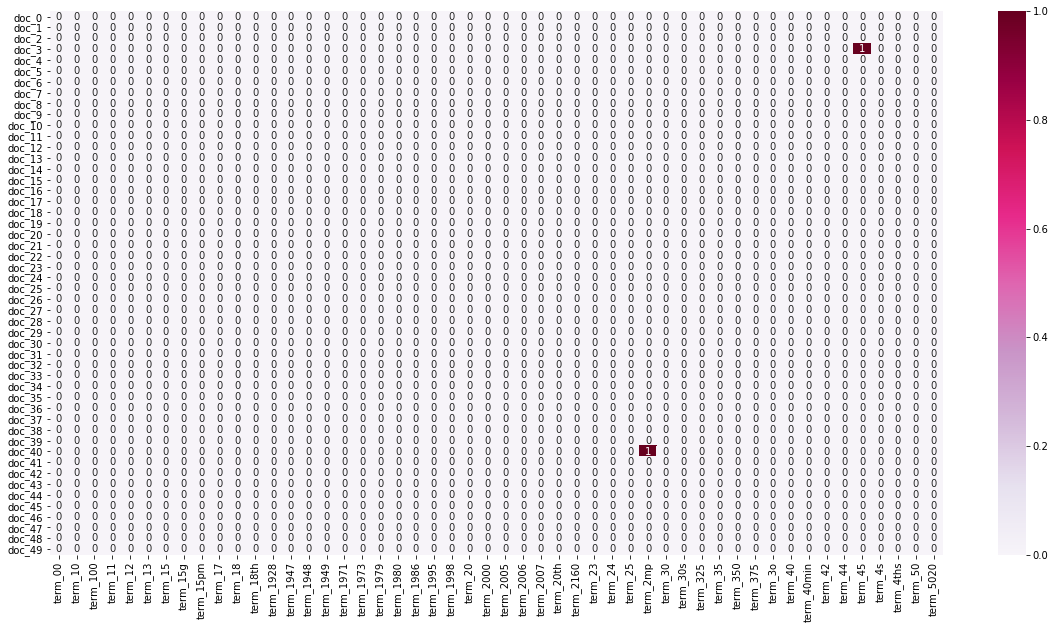

In [14]:
"""
Plot a heatmap of the first 50 terms against the first 50 documents of the document-term matrix.

Notice that the matrix is sparse.
"""

xplot = ["term_" + str(i) for i in cv.get_feature_names()[:50]]
yplot = ["doc_" + str(i) for i in list(master_df.index)[:50]]
zplot = master_counts[:50,:50].toarray()

df_heatmap = pd.DataFrame(zplot, columns = xplot, index = yplot)
plt.subplots(figsize=(20, 10))
ax = sns.heatmap(df_heatmap,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [15]:
print(master_counts.toarray().max()) # Gets the largest entry in the document term matrix

8


In [16]:
"""
Plots the entire document-term matrix, using colors an index for the numerical value of the entries.
Notice that the matrix is sparse.
"""

plt.subplots(figsize=(20,10))
ax = sns.heatmap(master_counts.toarray(), vmin = 0, vmax = 8,
                 cmap = ['lightgray','red','orange','lime','green','cyan','blue','purple'],
                 xticklabels = False, yticklabels = False)
ax.set_xlabel('Terms')
ax.set_ylabel('Documents')
plt.show()

## Dimensionality Reduction

In [17]:
"""
Reduces the document-term matrix using PCA into 2 dimensions and plots the results.

There does not seem to be anything that distinguishes the sentences with 0 score from the sentences with 1 score, apart
from the fact that the sentences with 1 score is more dispersed.
"""

master_2d = PCA(n_components = 2).fit_transform(master_counts.toarray())

score = [0,1]
color = ['red', 'blue']

fig = plt.figure(figsize = (20,10))
ax = fig.subplots()

for col,scr in zip(color, score):
    xs = master_2d[master_df['score'] == scr].T[0]
    ys = master_2d[master_df['score'] == scr].T[1]
    ax.scatter(xs, ys, c = col, marker='o', label = scr)

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.legend(title = 'Score')

plt.show()

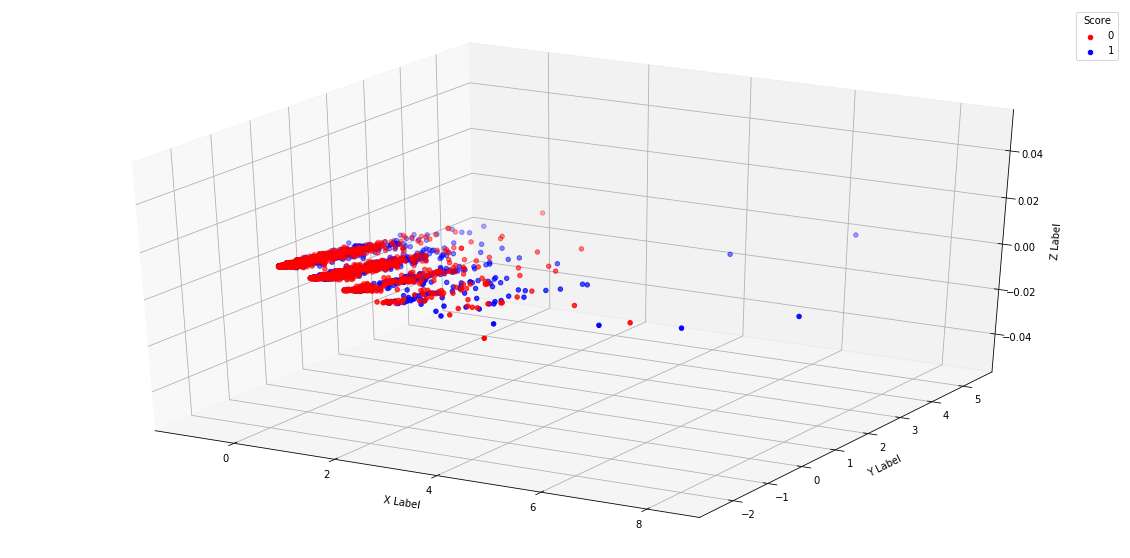

In [18]:
"""
Reduces the document-term matrix into 3 dimensions with PCA and plots the results.
"""

master_3d = PCA(n_components = 3).fit_transform(master_counts.toarray())

score = [0,1]
color = ['red', 'blue']

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection = '3d')

for col,scr in zip(color, score):
    xs = master_3d[master_df['score'] == scr].T[0]
    ys = master_3d[master_df['score'] == scr].T[1]
    zs = master_3d[master_df['score'] == scr].T[2]
    ax.scatter(xs, ys, c = col, marker='o', label = scr)

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.legend(title = 'Score')

plt.show()

## Attribute Transformation / Aggregation

In [19]:
term_frequencies = np.asarray(master_counts.sum(axis = 0))[0] # Gets the sum of term frequency throughout all documents
term_frequencies[1]

36

In [20]:
df_tf = pd.DataFrame(data = {'term' : cv.get_feature_names(), 'frequency' : term_frequencies})
df_tf = df_tf.sort_values(by = 'frequency', ascending = False).reset_index(drop = True)

df_tf.head()

term  frequency
0  the       1951
1  and       1138
2   it        789
3   is        751
4   to        669

In [21]:
"""
IMPORTANT NOTE: plotly may not show results without running this cell first. Refer to 
DM19-Lab1-SentimentLabelledSentences.ipynb in the Master repository and run the code from the top to view results.

Plots the top 200 most frequent terms throughout the corpus. Notice that the distribution is exponential.
"""

data = {
    "type" : "bar",
    "x" : df_tf.loc[:200,'term'],
    "y" : df_tf.loc[:200,'frequency'],
    "marker" : {"color": "green"}
}

layout = {
  "title": "Word Frequency", 
  "width": 800, 
  "yaxis": {
    "title": "Frequency", 
    "gridcolor": "white"
  }, 
  "xaxis": {
    "title": "Words", 
    "gridcolor": "white",
    "type": "category"
  }, 
  "dragmode":"zoom",
  "plot_bgcolor": "white", 
  "paper_bgcolor": "white"
}

fig = go.FigureWidget(data=[data], layout = layout)
fig.show()

In [22]:
df_tf['frequency log'] = df_tf['frequency'].apply(math.log) # Creates a new frequency logarithm column
df_tf.head()

term  frequency  frequency log
0  the       1951       7.576097
1  and       1138       7.037028
2   it        789       6.670766
3   is        751       6.621406
4   to        669       6.505784

In [23]:
"""
IMPORTANT NOTE: plotly may not show results without running this cell first. Refer to 
DM19-Lab1-SentimentLabelledSentences.ipynb in the Master repository and run the code from the top to view results.

Plots the top 200 most frequent terms throughout the corpus in a logarithmic plot.
"""

data2 = {
    "type" : "bar",
    "x" : df_tf.loc[:200,'term'],
    "y" : df_tf.loc[:200,'frequency log'],
    "marker" : {"color": "green"}
}

layout2 = {
  "title": "Word Frequency (Natural Log)", 
  "width": 800, 
  "yaxis": {
    "title": "Frequency (Natural Log)", 
    "gridcolor": "white"
  }, 
  "xaxis": {
    "title": "Words", 
    "gridcolor": "white",
    "type": "category"
  }, 
  "dragmode":"zoom",
  "plot_bgcolor": "white", 
  "paper_bgcolor": "white"
}

fig = go.FigureWidget(data=[data2], layout = layout2)
fig.show()

## Discretization and Binarization

In [24]:
"""
Binarize the 'score' and 'source' columns with two binarizers.
"""

mlb1 = preprocessing.LabelBinarizer()
mlb2 = preprocessing.LabelBinarizer()
mlb1.fit(master_df.score)
mlb2.fit(master_df.source)

master_df['bin score'] = mlb1.transform(master_df['score']).tolist()
master_df['bin source'] = mlb2.transform(master_df['source']).tolist()
master_df.head()

sentence  score  source  \
0  So there is no way for me to plug it in here i...      0  amazon   
1                        Good case, Excellent value.      1  amazon   
2                             Great for the jawbone.      1  amazon   
3  Tied to charger for conversations lasting more...      0  amazon   
4                                  The mic is great.      1  amazon   

                                            unigrams bin score bin source  
0  [So, there, is, no, way, for, me, to, plug, it...       [0]  [1, 0, 0]  
1               [Good, case, ,, Excellent, value, .]       [1]  [1, 0, 0]  
2                      [Great, for, the, jawbone, .]       [1]  [1, 0, 0]  
3  [Tied, to, charger, for, conversations, lastin...       [0]  [1, 0, 0]  
4                           [The, mic, is, great, .]       [1]  [1, 0, 0]

# Data Exploration

Objective:  
- Compare the cosine similarity of a sample of 3 sentences.

In [25]:
sen_to_transform = master_df.sample(3)['sentence'].values.tolist() # Take sample of 3 sentences from the dataset
sen_to_transform

['The scenery that the two daughters paint and photograph are beautiful.  ',
 "It's also great to see that renowned silent screenwriter Frances Marion hasn't missed a step going from silent to sound.  ",
 "Each day of the week they have a different deal and it's all so delicious!"]

In [26]:
sen_vector_count = []
sen_to_transform = [[sen] for sen in sen_to_transform]

for sen in sen_to_transform:
    sen_vector_count.append(cv.transform(sen)) # Transforms the 3 sentences into vector form using CountVectorizer
    
sen_vector_count_bin = []
for item in sen_vector_count:
    sen_vector_count_bin.append(binarize(item)) # Binarize the resulting 3 vectors

In [27]:
for item in sen_vector_count:
    print(item.todense())

[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [28]:
"""
Calculates the cosine similarities of all possible combinations of the 3 sentences.
"""

combinations = [[1,1],[1,2],[1,3],[2,2],[2,3],[3,3]]

for com in combinations:
    a = cosine_similarity(sen_vector_count[com[0]-1], sen_vector_count[com[1]-1], dense_output=True)
    print('Cosine similarity of sentence ' + str(com[0]) + ' and ' + str(com[1]) + ': %(x)f' %{'x':a})

Cosine similarity of sentence 1 and 1: 1.000000
Cosine similarity of sentence 1 and 2: 0.057831
Cosine similarity of sentence 1 and 3: 0.222375
Cosine similarity of sentence 2 and 2: 1.000000
Cosine similarity of sentence 2 and 3: 0.055728
Cosine similarity of sentence 3 and 3: 1.000000


---

# Part 3: Extra Tasks

- More Meaningful Visualizations
    - Sentiment distribution over different platforms (stacked bar chart)
    - Word cloud for positive and negative sentences (word cloud)
    - Relationship between word count and output score (boxplot)
- TF-IDF
- Naive Bayes Classifier

## More Meaningful Visualizations

### Sentiment distribution over different platforms

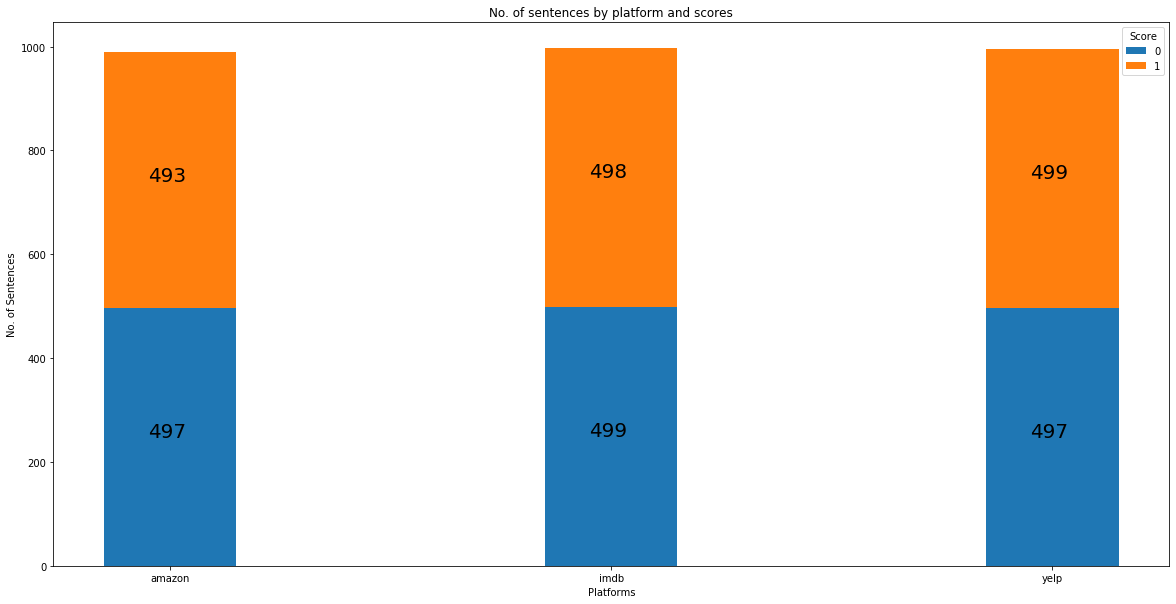

In [29]:
"""
The results that over all the platforms, the proportion between negative (score = 0) and positive (score = 1) sentences
are roughly equal.
"""

platforms = ['amazon', 'imdb', 'yelp']
zeros = []
ones = []

for pf in platforms:
    zeros.append(master_df[(master_df['source'] == pf) & (master_df['score'] == 0)].count()['score'])
    ones.append(master_df[(master_df['source'] == pf) & (master_df['score'] == 1)].count()['score'])

ind = np.arange(len(platforms))
width = 0.3

fig = plt.figure(figsize = (20,10))
plt.bar(ind, zeros, width, label = '0')
plt.bar(ind, ones, width, bottom = zeros, label = '1')

for xpos in ind:
    ypos = round(zeros[xpos]/2)
    plt.text(xpos-0.05, ypos, str(zeros[xpos]), c = 'black', fontsize = 20)
    ypos += ones[xpos]
    plt.text(xpos-0.05, ypos, str(ones[xpos]), c = 'black', fontsize = 20)

plt.xlabel('Platforms')
plt.ylabel('No. of Sentences')
plt.title('No. of sentences by platform and scores')
plt.xticks(ind, platforms)

plt.legend(title = 'Score')

plt.show()

### Word cloud for positive and negative sentences

In [30]:
negative = (master_df[master_df['score'] == 0])['sentence'].tolist()
negative_corpus = ' '.join(negative)

positive = (master_df[master_df['score'] == 1])['sentence'].tolist()
positive_corpus = ' '.join(positive)

In [31]:
"""
From the wordcloud, we can see that there are some terms that generally appear in negative sentences (e.g. terrible, bad)
and terms that generally appear in positive sentences (e.g. great, good). Of course, this can be made better if we consider
the context (e.g. "not good" represents a negative sentiment, even though it contains the word "good").
"""
from wordcloud import WordCloud

wc_neg = WordCloud(width=1600, height=800, max_font_size=200).generate(negative_corpus)
wc_pos = WordCloud(width=1600, height=800, max_font_size=200).generate(positive_corpus)

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax1.imshow(wc_neg, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Negative sentiment')

ax2 = fig.add_subplot(122)
ax2.imshow(wc_pos, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Positive sentiment')

Text(0.5, 1.0, 'Positive sentiment')

### Relationship between word count and output score

In [32]:
"""
We use regular expression to tokenize the sentences into individual words, removing the punctuations.
"""
from nltk.tokenize import RegexpTokenizer
master_df['clean sentence'] = master_df['sentence'].apply(lambda x: RegexpTokenizer(r'\w+').tokenize(x))
master_df['sentence word count'] = master_df['clean sentence'].apply(len)
master_df.head()

sentence  score  source  \
0  So there is no way for me to plug it in here i...      0  amazon   
1                        Good case, Excellent value.      1  amazon   
2                             Great for the jawbone.      1  amazon   
3  Tied to charger for conversations lasting more...      0  amazon   
4                                  The mic is great.      1  amazon   

                                            unigrams bin score bin source  \
0  [So, there, is, no, way, for, me, to, plug, it...       [0]  [1, 0, 0]   
1               [Good, case, ,, Excellent, value, .]       [1]  [1, 0, 0]   
2                      [Great, for, the, jawbone, .]       [1]  [1, 0, 0]   
3  [Tied, to, charger, for, conversations, lastin...       [0]  [1, 0, 0]   
4                           [The, mic, is, great, .]       [1]  [1, 0, 0]   

                                      clean sentence  sentence word count  
0  [So, there, is, no, way, for, me, to, plug, it...                   21  
1                     [Good, case, Excellent, value]                    4  
2                         [Great, for, the, jawbone]                    4  
3  [Tied, to, charger, for, conversations, lastin...                   12  
4                              [The, mic, is, great]                    4

In [33]:
"""
The results show that the distribution of word count for positive and negative sentences are roughly similar
(the quartiles are at around the same place). Positive sentences, however, has more extreme outliers than 
negative sentences.
"""

zeros_wcount = master_df[master_df['score'] == 0]['sentence word count'].values.tolist()
ones_wcount = master_df[master_df['score'] == 1]['sentence word count'].values.tolist()

bp_data2 = [zeros_wcount, ones_wcount]
bp_labels = ['NEGATIVE', 'POSITIVE']

fig = plt.figure(figsize = (20,10))
plt.boxplot(bp_data2, labels = bp_labels)
plt.title('Word Count vs. Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Word count')

plt.show()

## TF-IDF

In [34]:
"""
Generates a TF-IDF matrix
"""

from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer()
x1 = tv.fit_transform(master_df['sentence'].tolist())
x1.shape

(2983, 5159)

In [35]:
x1.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Naive Bayes Classifier

In [36]:
y = master_df['score'].tolist()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y) # Splits the TF-IDF data into training data and testing data

In [38]:
clf1 = naive_bayes.MultinomialNB()
clf1.fit(x1_train, y1_train) # Training the first classifier using TF-IDF data

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [39]:
x2 = master_counts # Document-term frequency matrix
x2.shape

(2983, 5159)

In [40]:
x2.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y)

clf2 = naive_bayes.MultinomialNB()
clf2.fit(x2_train, y2_train) # Training the second classifier using term frequency data

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [42]:
from sklearn import metrics

print(metrics.classification_report(y, clf1.predict(x1)))
print(metrics.confusion_matrix(y, clf1.predict(x1))) # Performance results for classifier 1 (TF-IDF)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1493
           1       0.95      0.90      0.92      1490

    accuracy                           0.92      2983
   macro avg       0.92      0.92      0.92      2983
weighted avg       0.92      0.92      0.92      2983

[[1416   77]
 [ 153 1337]]


In [43]:
print(metrics.classification_report(y, clf2.predict(x2)))
print(metrics.confusion_matrix(y, clf2.predict(x2))) # Performance results for classifier 2 (term frequency)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1493
           1       0.93      0.89      0.91      1490

    accuracy                           0.92      2983
   macro avg       0.92      0.92      0.92      2983
weighted avg       0.92      0.92      0.92      2983

[[1400   93]
 [ 159 1331]]


### Discussion of classifier performance

- Both classifiers achieved an accuracy of 92%, but the results of the confusion matrix differs by a little bit. 
- Classifier 1 has more true positives and false negatives, while Classifier 2 has more false positives and true negatives. 
- If we looked at the classification report, we can see that the average precision and recall for both classifiers are similar. It differs by a little bit for each score (0 or 1).
- This shows that in this case, using TF-IDF or term frequency as features make very little difference.

---

# Part 4: Reflection

<b>Q: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?</b>


A:

Since the lab activity is meant to teach us, there are some parts which serve only as an explanation and does not serve as a proper step towards data exploration. Examples include, but are not limited to the query technique in Exercises 2 and 3, as well as the intentional generation and removal of null and duplicate data.

As for the preprocessing stage, the sampling as well as the visualization comparison between the original and the sampled data is not relevant, since it only verifies that the sample is random (hence the distribution for both types of data is similar). The sample is only useful in visualizing the document-term matrix (See Exercise 11 (take home exercise) in Part 1).

The Feature Creation step is also irrelevant, since the "unigrams" data is not used at all. This step also tokenizes punctuations, and is not required (unless if a punctuation analysis is required). Tokenization with regular expressions would be a better alternative since we can customize how we want to tokenize the text data.

For the Attribute Transformation / Aggregation step, the plot for unsorted data is not necessary, since it would be difficult to infer any useful information from it anyway. It would be better to plot sorted data instead to get a glimpse of the distribution, which turns out to be exponential. The logarithmic plot should also be sorted for ease of inference.

Binarization is also unnecessary (for now) since we did not utilize the binarized data. If we were to work on neural networks, only then will binarization be used.

Finally, the entire Data Exploration where we calculated the cosine similarity of samples of sentences does not add to any new information on the entire dataset. In fact, every time when we generate a plot in the Data Preprocessing step, it is also a form of Data Exploration since we discover new patterns in the dataset (e.g. word frequency is exponentially distributed, no clear separation between different categories based on PCA on word frequency, etc).